# Running unsupported languages via the shell

In [26]:
!echo "We can run shell commands via '!'"

We can run shell commands via '!'


## Running Faust

so long as we use absolute paths or everything is in PATH, we can list code; with an IPython widget we can even expose editing (but we can't mix kernels). Here's a Faust example from the checkout:

In [27]:
!cat /home/$USER/src/faust/examples/phasing/phaserFlangerLab.dsp


declare name "phaserFlangerLab";

import("stdfaust.lib");

//process = ol.sawtooth_demo <: 
//  el.flanger_demo : el.phaser2_demo :> fl.spectral_level_demo <: _,_;

fx_stack = 
 vgroup("[1]", dm.sawtooth_demo) <:
 vgroup("[2]", dm.flanger_demo) : 
 vgroup("[3]", dm.phaser2_demo);

level_viewer(x,y) = attach(x, vgroup("[4]", dm.spectral_level_demo(x+y))),y;

process = fx_stack : level_viewer;


## Generating SVG
We can shell out to faust2svg then include the SVG via Python, or in some cases directly in Markdown.

We plot a high-level process.dsp file, then a more interesting allpass. Note that for the allpass, the exact filename of the inner .dsp rendering may differ on your end machine.

In [28]:
!faust2svg /home/$USER/src/faust/examples/phasing/phaser.dsp

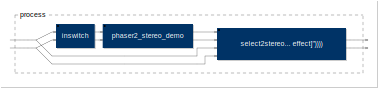

In [29]:
from IPython.display import Image
from IPython.core.display import SVG
import getpass # only for anonymous submission's username. $USER doesn't work here.
SVG("/home/" + getpass.getuser() + "/src/faust/examples/phasing/phaser-svg/process.svg")

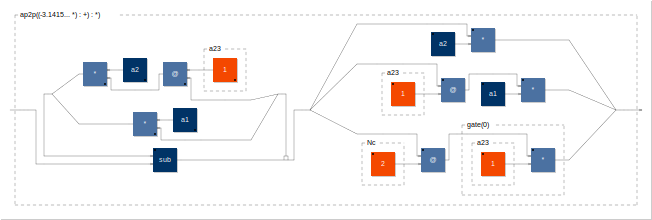

In [30]:
SVG("/home/" + getpass.getuser() + "/src/faust/examples/phasing/phaserFlangerLab-svg/ap2p-0x7fa750e99e30.svg")

## Rendering audio

Similarly we can invoke a process to test our .dsp file and display the audio as in Notebook 1.